In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import aux
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

This notebook contains the code to reproduce the analysis and plotting for the second figure, using the companion dataset (which gives summary statistics for all plastic spiking networks simulated on the ISTA cluster)  

### Common to all sections: computing all task responses

In [ ]:
# # novelty detection, familiarity detection and transient dynamics, similar to fig1.H
# save_dir = "../../../Data_Sims/BND_IF_EEEIIEII_6pPol/"

# data1 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_19082024_metrics.npy",))
# data2 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_20082024_metrics.npy",))
# data3 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_17092024_metrics.npy",))
# data4 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_22092024_metrics.npy",))
# data5 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_24092024_metrics.npy",))
# dataset_list = [data1, data2, data3, data4, data5]

# n_rules = len(data1)
# dr = np.array([2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01) for d in dataset_list])
# dsr = np.array([2*(d['std_nov'] - d['std_fam']) / (d['std_nov'] + d['std_fam']+0.01) for d in dataset_list])
# mdr = np.mean(dr, axis=0)
# mdsr = np.mean(dsr, axis=0)
# on_nov = np.max(data1['prate'][:,:,10:20], axis=2)/(np.nanmean(data1['prate'][:,:,10:20], axis=2)+0.01)

# n_ts = 10
# pvalues = np.zeros((n_rules, n_ts))
# for t in range(n_ts):
#     for ind in range(n_rules):
#         r_nov_samples = np.array([d['r_nov'][ind,t] for d in dataset_list])
#         r_fam_samples = np.array([d['r_fam'][ind,t] for d in dataset_list])
#         pvalues[ind, t] = ttest_ind(r_nov_samples, r_fam_samples).pvalue
# sign_resp_bnd = pvalues < 0.05

# n_ts = 10
# pvalues_trampl = np.zeros((n_rules, n_ts))
# for t in range(n_ts):
#     for ind in range(n_rules):
#         on_nov_samples = np.array([np.max(d['prate'][ind,t,10:20], axis=0)/(np.nanmean(d['prate'][ind,t,10:20], axis=0)+0.01) for d in dataset_list])
#         on_fam_samples = np.array([np.max(d['prate'][ind,t,50:60], axis=0)/(np.nanmean(d['prate'][ind,t,50:60], axis=0)+0.01) for d in dataset_list])
#         pvalues_trampl[ind, t] = ttest_ind(on_nov_samples, on_fam_samples).pvalue
# sign_resp_trampl = pvalues_trampl < 0.05

In [ ]:
# # successor representation + contextual novelty
# seq3 = aux.load_and_merge("../../../Data_Sims/seq_IF_EEEIIEII_6pPol/",("2500_seq_1s4hBreaks_16112024_metrics.npy",)) #1235
# seq_list = [seq3]

# break_durations = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
# total_breaks = [np.sum(break_durations[:i+1]) for i in range(len(break_durations))]
# n_fam = 5
# n_tot = 7
# n_nov = 2
# n_rules = seq3['eng_rate'].shape[0]
# n_tests = seq3['eng_rate'].shape[1]
# n_engs = seq3['eng_rate'].shape[2]
# n_bins = seq3['eng_rate'].shape[3]
# ontime_test = 2 #in number of bins. usually bin is 0.1s
# offtime_test = 28 #in number of bins. usually bin is 0.1s
# test_starts = 10 #in number of bins, how long do we record pretest (usually 1s)
# t_breaks = [1, 9,  10, 40, 60,  180, 300, 600,  2400, 10800]

# # contextual novelty
# inds_stim = aux.get_inds_last_el_sequence_stim_pres(n_bins, test_starts, ontime_test, offtime_test,n_fam,n_nov)
# r_famfam =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5)] for seq in seq_list ] )
# r_famnov =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5,10)] for seq in seq_list ] )
# n_ts = 10
# pvalues_famnov =np.zeros((n_rules, n_ts))
# for t in range(n_ts):
#     for ind in range(n_rules):
#         r_famfam_samples = r_famfam[:,:,ind,t].flatten()
#         r_famnov_samples = r_famnov[:,:,ind,t].flatten()
#         pvalues_famnov[ind,t] = ttest_ind(r_famnov_samples, r_famfam_samples).pvalue
# sign_resp_cont_nov = pvalues_famnov < 0.05

# aux_big_array = np.nan_to_num(aux.get_dr_stfam(n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test, rpop=seq3['prate'],n_fam=n_fam,n_nov=n_nov), nan=0)
# dr_famnov = aux_big_array[0,:,:]

# # successor representation
# fams_novs_ttest = [aux.get_rsucc_rnov(eng_rate=seq['eng_rate'], n_tot=n_tot, n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test,
#                  n_rules=n_rules, n_tests=n_tests, n_fam=n_fam, n_engs=n_engs) for seq in seq_list]

# metric_num = 3 #3 = m+1
# pvalues_succ =np.zeros((n_rules, n_ts))
# for test_num in range(n_ts):
#     for rule_num in range(n_rules):
#         fam_samples = np.array( [ fams_novs_ttest[i][0][rule_num,test_num,metric_num,:] for i in range(len(seq_list)) ] ).flatten()
#         nov_samples = np.array( [ fams_novs_ttest[i][1][rule_num,test_num,:,:] for i in range(len(seq_list)) ] ).flatten()
#         pvalues_succ[rule_num, test_num] = ttest_ind(nov_samples, fam_samples).pvalue
# sign_resp_succ = pvalues_succ < 0.05

# # replay
# rhos = aux.get_rhos(np.nan_to_num(seq3['eng_rate'], nan=0), n_fam=5, n_nov=2)
# start_inds, stop_inds = aux.get_inds_start_single_stim_pres(test_starts, ontime_test, offtime_test)
# ts_max = aux.get_ts_maxrhos(rhos, start_inds, stop_inds, n_fam=5)
# rhos_max = np.zeros( ts_max.shape)
# for i in range(ts_max.shape[0]):
#     for j in range(ts_max.shape[1]):
#         for k in range(ts_max.shape[2]):
#             rhos_max[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]
# rhos_max_av = np.mean(rhos_max, axis=0)

# rhos_spec = np.zeros( ts_max.shape)
# for i in range(ts_max.shape[0]):
#     for j in range(ts_max.shape[1]):
#         for k in range(ts_max.shape[2]):
#             rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]
# rhos_spec_av = np.nan_to_num(np.mean(rhos_spec, axis=0), nan=0)

### Novelty/familiarity detection and on responses (Fig2.B,C&D)

In [6]:
# load all the rule quartets we simulated at least once in the familiarity/novelty task
save_dir = "../data/data_sims/BND_IF_EEEIIEII_6pPol/"
data = aux.load_and_merge(save_dir,("2850_1s4hBreaks_15082024_metrics.npy",
                        "mf_npe/1k_mfnpe_rexc_1s4hBreaks_16022025_metrics.npy",
                        "mf_npe/1k_mfnpe_rexcwblow_1s4hBreaks_18022025_metrics.npy",
                        "mf_npe/1k_1s4hBreaks_mfnpe_dr0p2_25022025_metrics.npy",
                        "mf_npe/1k_1s4hBreaks_mfnpe_dr0_25022025_metrics.npy",
                        "mf_npe/1k_1s4hBreaks_mfnpe_drm0p2_25022025_metrics.npy",
                        "mf_npe/1k_BND_mf_npe_ONnov1p5_040325_metrics.npy"))

inds_stable = aux.get_ind_stable(data)
d = data[inds_stable]
n_rules = len(d)
dr = 2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01)
on_nov = np.max(d['prate'][:,:,10:20], axis=2)/(np.nanmean(d['prate'][:,:,10:20], axis=2)+0.01)

retrieved 8850/8850 simulations
8760 / 8850 rules fulfill the rate condition 98.98305084745763 %
8538 / 8850 rules fulfill the cv condition 96.47457627118644 %
6666 / 8850 rules fulfill the wf condition 75.32203389830508 %
7326 / 8850 rules fulfill the w_blow condition 82.77966101694916 %
5850 / 8850 rules fulfill all conditions 66.10169491525424 %


n_nov_hard 88 0.0352


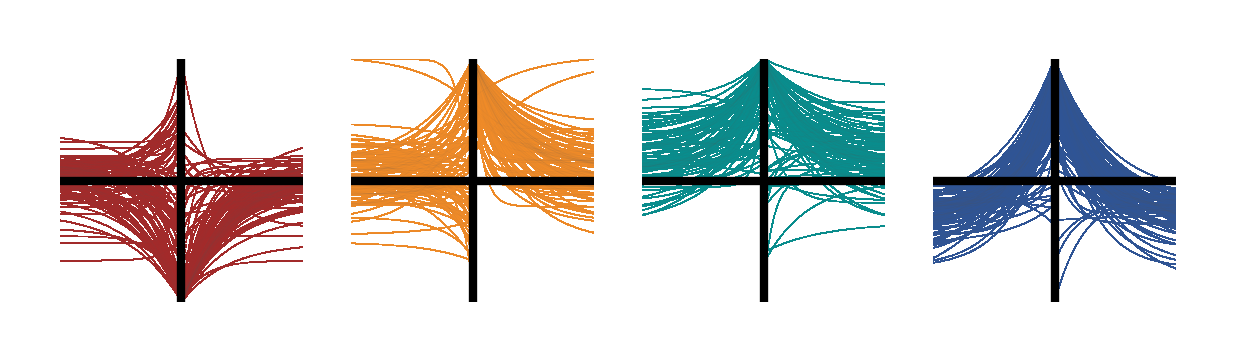

In [45]:
# select rule that respond strongly in the novelty detection task
inds_nov_hard = np.unique(np.where( aux.N_AND([dr[:,3]>0.1, dr[:,4]>0.1, dr[:,5]>0.1, dr[:,6]>0.1, dr[:,7]>0.1, dr[:,8]>0.1, dr[:,9]>0.1])))
n_nov_hard = len(inds_nov_hard)
print('n_nov_hard', n_nov_hard, n_nov_hard/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(d[inds_nov_hard]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)

aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

/Users/bcfx/Documents/Memory1000Rules/Code/Code_For_Paper/results/aux.py:622: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


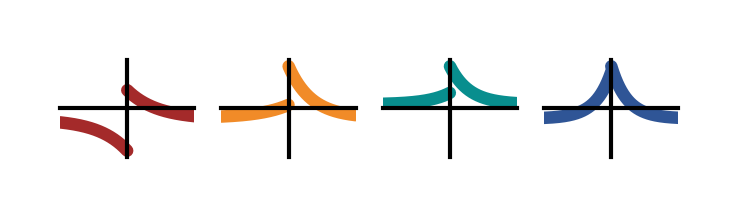

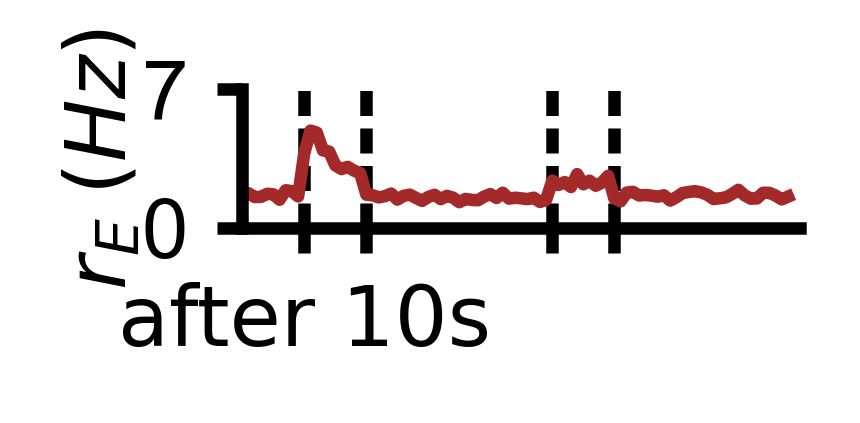

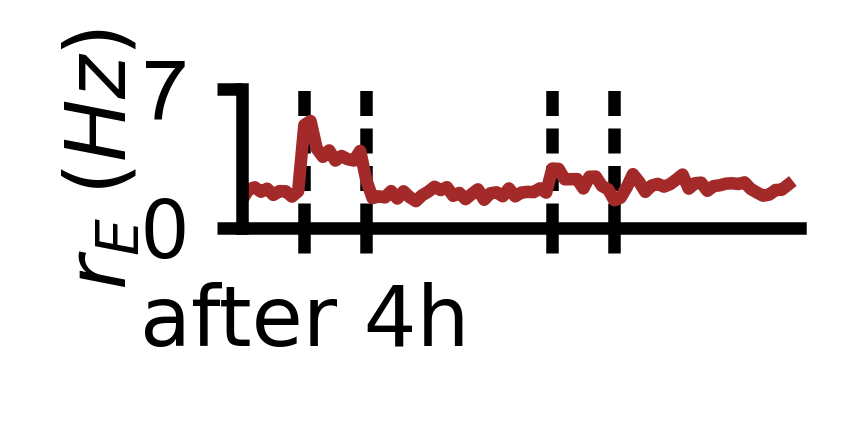

In [ ]:
# plot a specific rule
seed = '6a607a1f6cdc1a700dc2bb70fa9eedfe'

ind_seed = np.where(data['seed'] == seed)[0][0]
rule = data[ind_seed]['theta']
aux.plot_4_rules(rule, linewidth=1.5, axwidth=0.5,figsize=(1.33,0.21))

aux.plot_pop_rate(rs = data[ind_seed]["prate"][1,:],
                ts = [i for i in range(data[ind_seed]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,7],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['after 10s', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=0,
                dpi=600,
                target = None); plt.show()

aux.plot_pop_rate(rs = data[ind_seed]["prate"][9,:],
                ts = [i for i in range(data[ind_seed]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,7],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['after 4h', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=0,
                dpi=600,
                target = None); plt.show()

n_fam_hard 42 0.0168


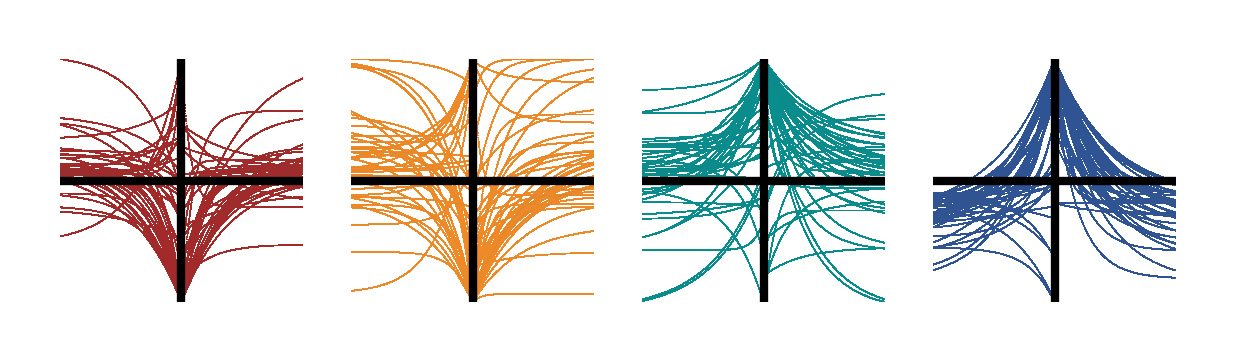

In [44]:
# select rule that robustly perform familiarity detection
inds_fam_hard  = np.unique(np.where( aux.N_OR( [aux.N_AND([dr[:,t]<-0.1, dr[:,t+1]<-0.1, dr[:,t+2]<-0.2]) for t in range(0,8,1)] )))
n_fam_hard = len(inds_fam_hard)
print('n_fam_hard', n_fam_hard, n_fam_hard/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(d[inds_fam_hard]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)
aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

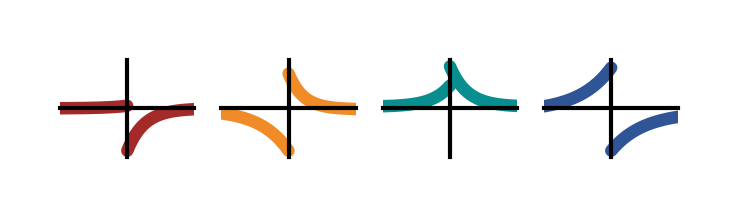

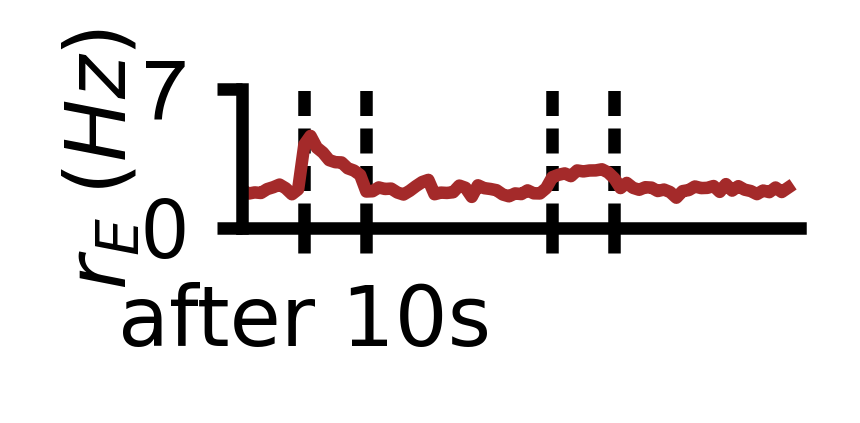

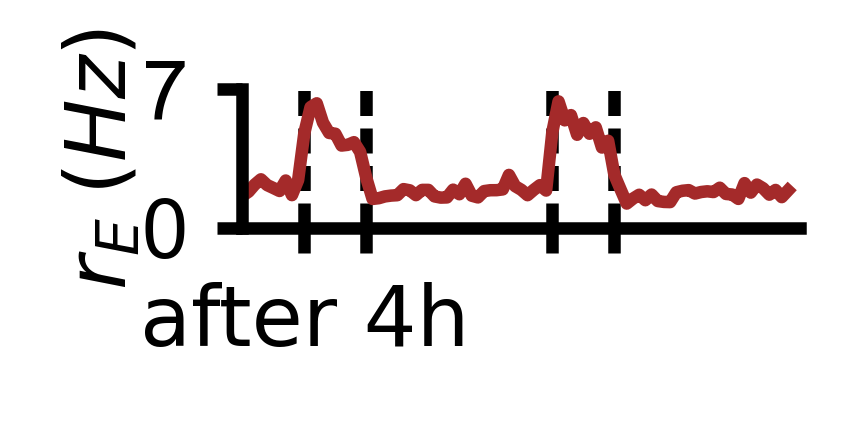

In [51]:
# plot a specific rule
seed = '18f51e20bbeb13867d12d418719839fe'

ind_seed = np.where(data['seed'] == seed)[0][0]
rule = data[ind_seed]['theta']
aux.plot_4_rules(rule, linewidth=1.5, axwidth=0.5,figsize=(1.33,0.21))

aux.plot_pop_rate(rs = data[ind_seed]["prate"][1,:],
                ts = [i for i in range(data[ind_seed]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,7],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['after 10s', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=0,
                dpi=600,
                target = None); plt.show()

aux.plot_pop_rate(rs = data[ind_seed]["prate"][9,:],
                ts = [i for i in range(data[ind_seed]["prate"].shape[1])],
                t_lim = [0,90],
                y_label = r'$r_E\; (Hz)$',
                r_lim = [0,7],
                color = aux.color_ee,
                x_ticks=[10, 20, 50, 60],
                x_milestones=[10, 20, 50, 60],
                x_ticklabels=['after 4h', '', '', ''],
                x_label = None,
                fontsize = 10,
                linewidth = 1.5,
                axwidth = 1.5,
                save_path = None,
                figsize = (1.2,0.3),
                rotation=0,
                dpi=600,
                target = None); plt.show()

n_ON_hard 40 0.016


/Users/bcfx/Documents/Memory1000Rules/Code/Code_For_Paper/results/aux.py:713: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


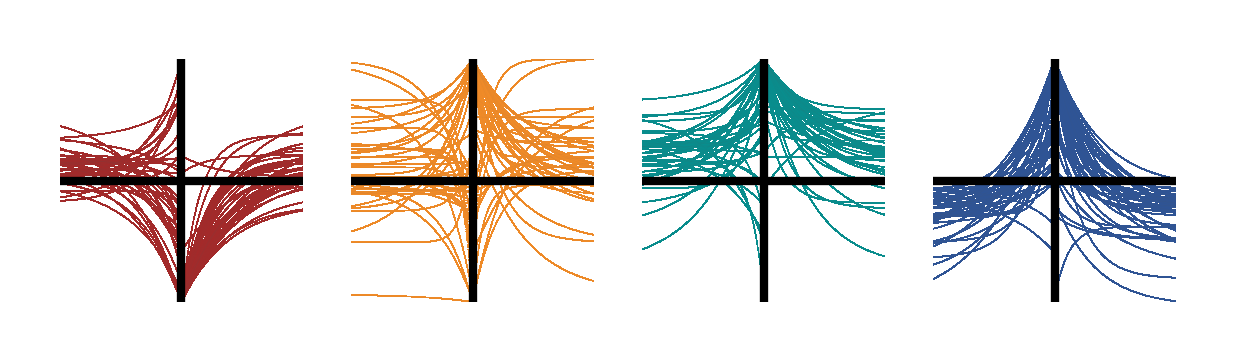

In [53]:
# select the rules with strong on reponses
inds_ON_hard = np.unique(np.where( np.all(on_nov[:,5:] >= 1.8, axis=1)))
n_ON_hard = len(inds_ON_hard)
print('n_ON_hard', n_ON_hard, n_ON_hard/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(d[inds_ON_hard]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)
aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

### Contextual novelty, sequential and coincidental replay (Fig 2.E,F&G)

retrieved 10500/10500 simulations
9215 / 10500 rules fulfill the rate condition 87.76190476190476 %
8637 / 10500 rules fulfill the cv condition 82.25714285714287 %
6773 / 10500 rules fulfill the wf condition 64.5047619047619 %
7188 / 10500 rules fulfill the w_blow condition 68.45714285714286 %
5338 / 10500 rules fulfill all conditions 50.838095238095235 %
[ 70 100 130 160 190] [ 99 129 159 189 219]
(5, 5338, 10, 759) (5, 5338, 10)
(5338, 10)


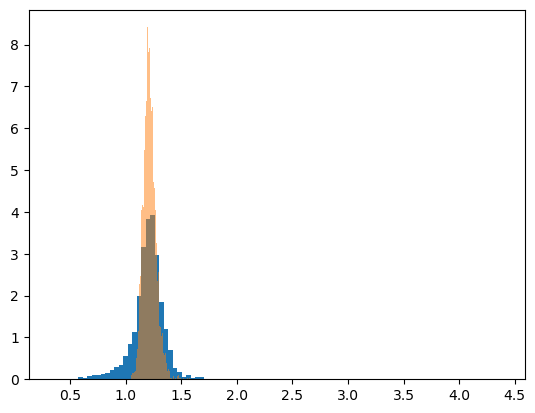

/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/3586709868.py:72: RuntimeWarning: divide by zero encountered in scalar divide
  rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]


In [ ]:
full_seq = aux.load_and_merge("../data/data_sims/seq_IF_EEEIIEII_6pPol/",("2500_seq_1s4hBreaks_16112024_metrics.npy",
                                                                            "4k_seq_1s4hBreaks_mfnpe_dr0p2_28022025_metrics.npy",
                                                                            "1k_seq_mf_npe_dr4h0p2_100325_metrics.npy",
                                                                            "1k_seq_mf_npe_rho1min2_130325_metrics.npy",
                                                                            '1k_seq_mf_npe_rho1min2_140325_metrics.npy',
                                                                            "1k_mf_npe_rho1min3_180325_metrics.npy"))
cond_all = aux.get_ind_stable(full_seq)
seq = full_seq[cond_all]
seq_list = [seq]

break_durations = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
total_breaks = [np.sum(break_durations[:i+1]) for i in range(len(break_durations))]
n_fam = 5
n_tot = 7
n_nov = 2
n_rules = seq['eng_rate'].shape[0]
n_tests = seq['eng_rate'].shape[1]
n_engs = seq['eng_rate'].shape[2]
n_bins = seq['eng_rate'].shape[3]
ontime_test = 2 #in number of bins. usually bin is 0.1s
offtime_test = 28 #in number of bins. usually bin is 0.1s
test_starts = 10 #in number of bins, how long do we record pretest (usually 1s)
t_breaks = [1, 9,  10, 40, 60,  180, 300, 600,  2400, 10800]

# contextual novelty
inds_stim = aux.get_inds_last_el_sequence_stim_pres(n_bins, test_starts, ontime_test, offtime_test,n_fam,n_nov)
r_famfam =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5)] for seq in seq_list ] )
r_famnov =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5,10)] for seq in seq_list ] )
n_ts = 10
pvalues_famnov =np.zeros((n_rules, n_ts))
for t in range(n_ts):
    for ind in range(n_rules):
        r_famfam_samples = r_famfam[:,:,ind,t].flatten()
        r_famnov_samples = r_famnov[:,:,ind,t].flatten()
        pvalues_famnov[ind,t] = ttest_ind(r_famnov_samples, r_famfam_samples).pvalue
sign_resp_cont_nov = pvalues_famnov < 0.05

aux_big_array = np.nan_to_num(aux.get_dr_stfam(n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test, rpop=seq['prate'],n_fam=n_fam,n_nov=n_nov), nan=0)
dr_famnov = aux_big_array[0,:,:]

# successor representation
fams_novs_ttest = [aux.get_rsucc_rnov(eng_rate=seq['eng_rate'], n_tot=n_tot, n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test,
                 n_rules=n_rules, n_tests=n_tests, n_fam=n_fam, n_engs=n_engs) for seq in seq_list]

metric_num = 3 #3 = m+1
pvalues_succ =np.zeros((n_rules, n_ts))
for test_num in range(n_ts):
    for rule_num in range(n_rules):
        fam_samples = np.array( [ fams_novs_ttest[i][0][rule_num,test_num,metric_num,:] for i in range(len(seq_list)) ] ).flatten()
        nov_samples = np.array( [ fams_novs_ttest[i][1][rule_num,test_num,:,:] for i in range(len(seq_list)) ] ).flatten()
        pvalues_succ[rule_num, test_num] = ttest_ind(nov_samples, fam_samples).pvalue
sign_resp_succ = pvalues_succ < 0.05

# replay
rhos = aux.get_rhos(np.nan_to_num(seq['eng_rate'], nan=0), n_fam=5, n_nov=2)
start_inds, stop_inds = aux.get_inds_start_single_stim_pres(test_starts, ontime_test, offtime_test)
ts_max = aux.get_ts_maxrhos(rhos, start_inds, stop_inds, n_fam=5)
rhos_max = np.zeros( ts_max.shape)
for i in range(ts_max.shape[0]):
    for j in range(ts_max.shape[1]):
        for k in range(ts_max.shape[2]):
            rhos_max[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]
rhos_max_av = np.mean(rhos_max, axis=0)

rhos_spec = np.zeros( ts_max.shape)
for i in range(ts_max.shape[0]):
    for j in range(ts_max.shape[1]):
        for k in range(ts_max.shape[2]):
            rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]
rhos_spec_av = np.nan_to_num(np.mean(rhos_spec, axis=0), nan=0)

#### Contextual novelty

n_cont_nov_hard 52 0.0208


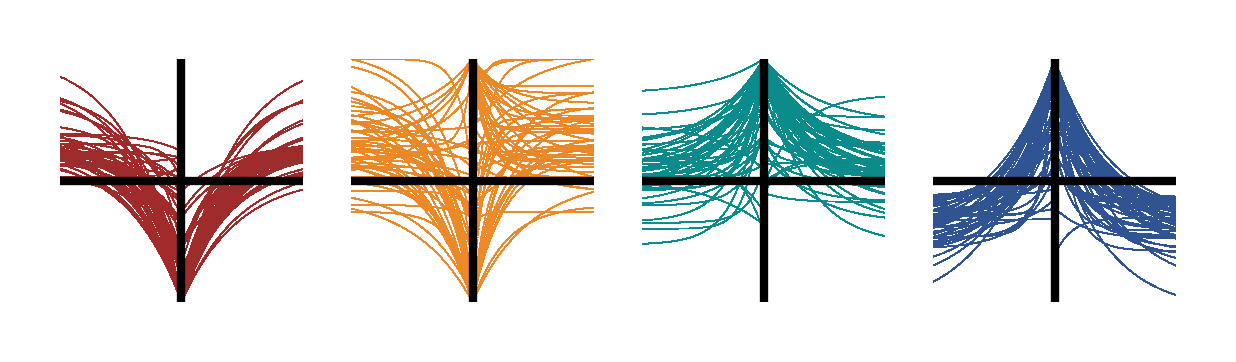

In [61]:
# select rules for contextual novelty
inds_cont_nov_hard = np.unique(np.where( np.all(dr_famnov[:,1:6] >= 0.15, axis=1)))
n_cont_nov_hard = len(inds_cont_nov_hard)
print('n_cont_nov_hard', n_cont_nov_hard, n_cont_nov_hard/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(seq[inds_cont_nov_hard]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)

aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)


#### Sequential replay

n_seq_replay 18 0.0072


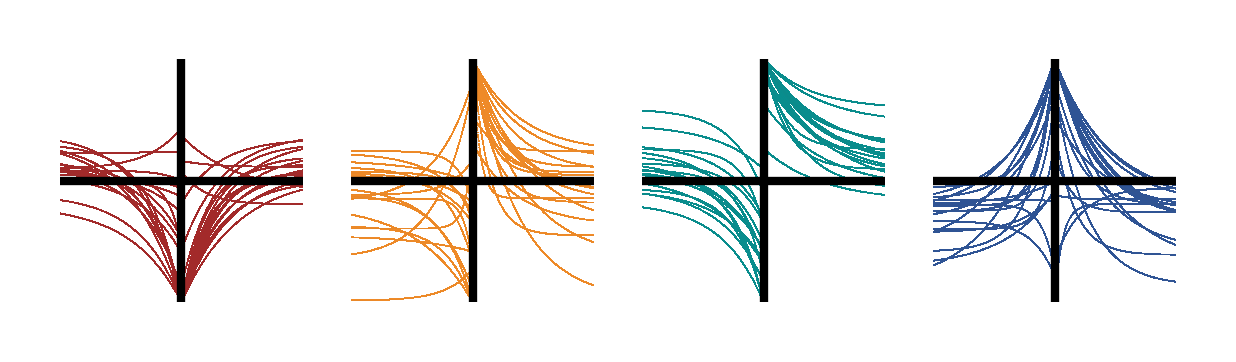

In [62]:
# select rules for sequential replay
inds_seq_replay = np.unique(np.where( aux.N_OR( [aux.N_AND([rhos_max_av[:,t]>2, (ts_max[0, :, t]-start_inds[0])>4, rhos_spec_av[:,t]>1.5]) for t in range(10)] ))[0])
n_seq_replay = len(inds_seq_replay)
print('n_seq_replay', n_seq_replay, n_seq_replay/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(seq[inds_seq_replay]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)

aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

/Users/bcfx/Documents/Memory1000Rules/Code/Code_For_Paper/results/aux.py:630: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


matrix found from 4096 to 4096 neurons. 9.99 % sparsity
matrix found from 1024 to 4096 neurons. 9.99 % sparsity
matrix found from 1024 to 4096 neurons. 9.99 % sparsity
matrix found from 1024 to 1024 neurons. 10.0 % sparsity


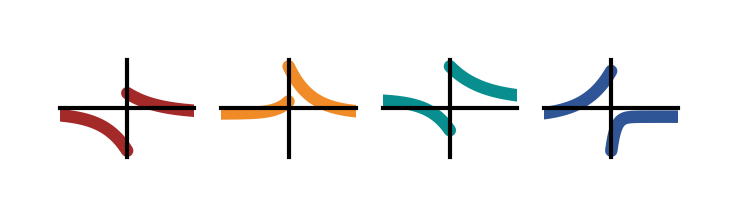

In [82]:
## Plot one rule quartet in detail
seed = 'a00feeeb909e4320c023a537f7baf3c1' # rule for top plot
# seed = 'f19bec85c2d4104a767b4b821891852d' # rule for bottom plot
file_dir = '../data/data_sims/seq_IF_EEEIIEII_6pPol/rule_examples/' + seed + '/'

# plot rule quartet
ind_seed = np.where(seq['seed'] == seed)[0][0]
rule = seq[ind_seed]['theta']
aux.plot_4_rules(rule, linewidth=1.5, axwidth=0.5,figsize=(1.33,0.21))

# extract spiketimes
sts_e = aux.read_monitor_spiketime_files(file_dir + 'out.e.'+seed+'.0.ras')
sts_i = aux.read_monitor_spiketime_files(file_dir + 'out.i.'+seed+'.0.ras')

# extract weight matrices
wee = aux.load_w_mat(file_dir + 'full_ee.0.syn')
wei = aux.load_w_mat(file_dir + 'full_ie.0.syn')
wie = aux.load_w_mat(file_dir + 'full_ie.0.syn')
wii = aux.load_w_mat(file_dir + 'full_ii.0.syn')

# compute mean weights for each matrix
wee_mean = np.mean(wee["w"]["w"])
wei_mean = np.mean(wei["w"]["w"])
wie_mean = np.mean(wie["w"]["w"])
wii_mean = np.mean(wii["w"]["w"])

0.06631506979465485 0.38763974151677555 0.5022818446159363


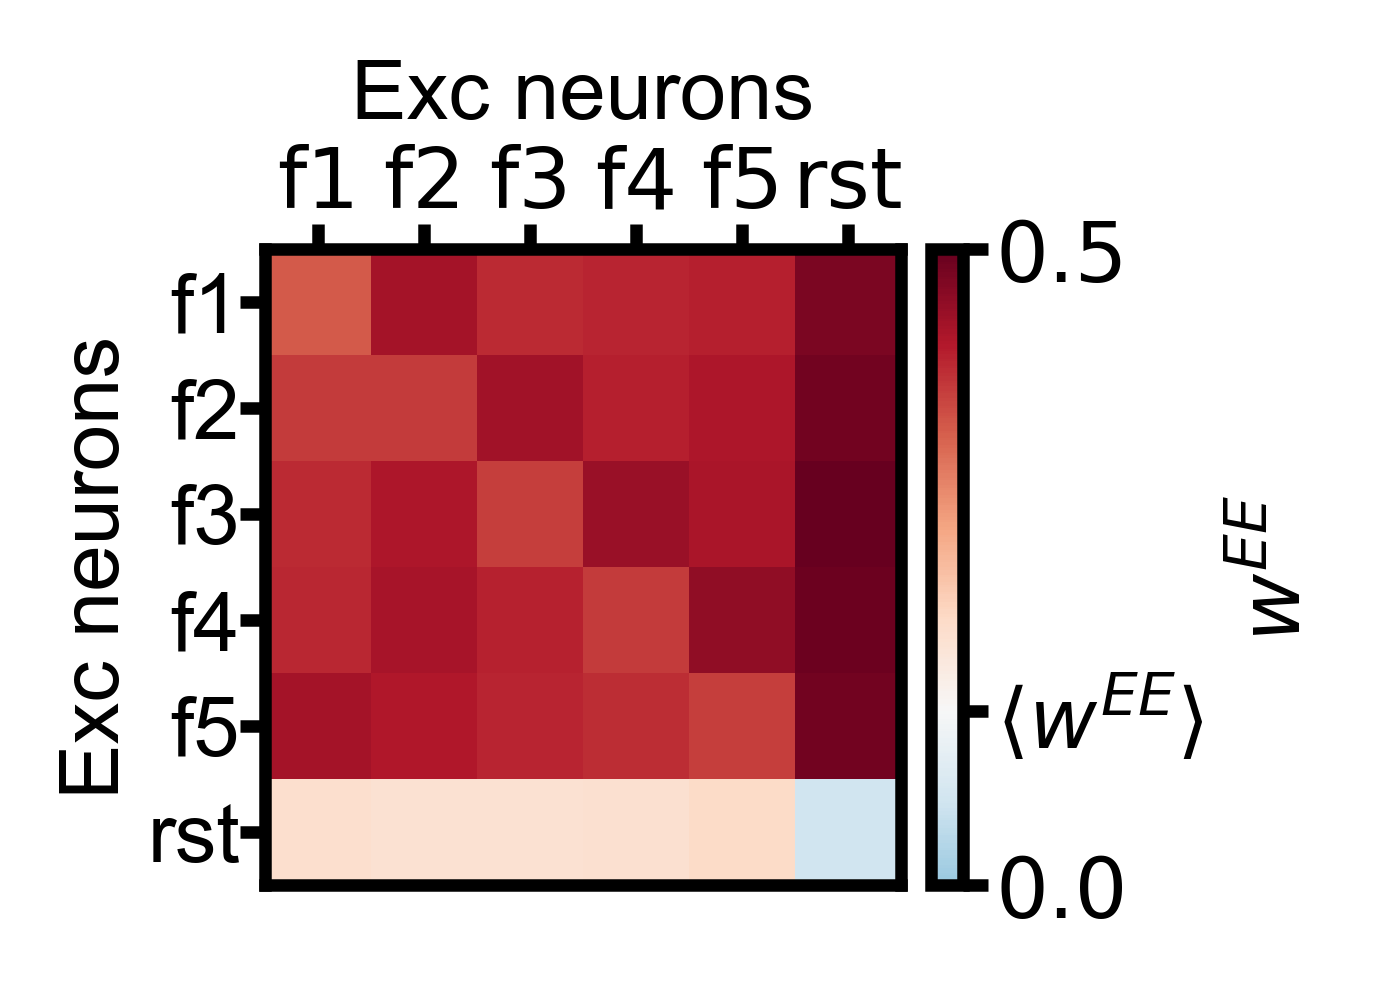

()

In [ ]:
# weight matrix analysis
start_times = np.array([30, 32, 34, 36, 38, 40, 42])
engrams_exc = aux.translate_engram(aux.get_engram_neurons(sts_e, start_times, duration=1, n_tot_stim=7, frac_size_engram=0.1, n_neurons=4096))
engrams_inh = aux.translate_engram(aux.get_engram_neurons(sts_i, start_times, duration=1, n_tot_stim=7, frac_size_engram=0.1, n_neurons=1024))

engrams_exc['7'] = aux.get_non_engrams([2,3,4,5,6], engrams_exc, n_neurons=4096)
engrams_inh['7'] = aux.get_non_engrams([2,3,4,5,6], engrams_inh, n_neurons=1024)

# plot matrix sorted by engram neurons
aux.plot_engram_matrix(w=wee,
                pre_engrams=engrams_exc,
                post_engrams=engrams_exc,
                engrams_to_plot = [2,3,4,5,6,7],
                labels = ['f1', 'f2', 'f3', 'f4', 'f5', 'rst'],
                N_familiar=5,
                figsize=(1.5,1.5),
                v_lim=None,
                cmap=plt.get_cmap("RdBu_r"),
                fontsize=10,
                mean_weight=wee_mean,
                cbarticks=None,
                cbarlabel=r'$w^{EE}$',
                cbarticklabels=[r'$\langle w^{EE} \rangle$'],
                xlabelpad=3,
                ylabelpad=1.5,
                xticklabelpad=0,
                yticklabelpad=0,
                axwidth=1.5,
                xlabel= "Exc neurons",
                ylabel= "Exc neurons")

test_session 2


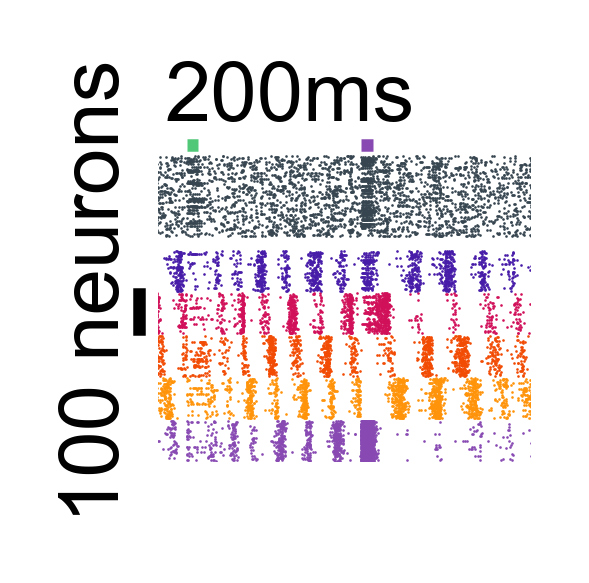

test_session 9


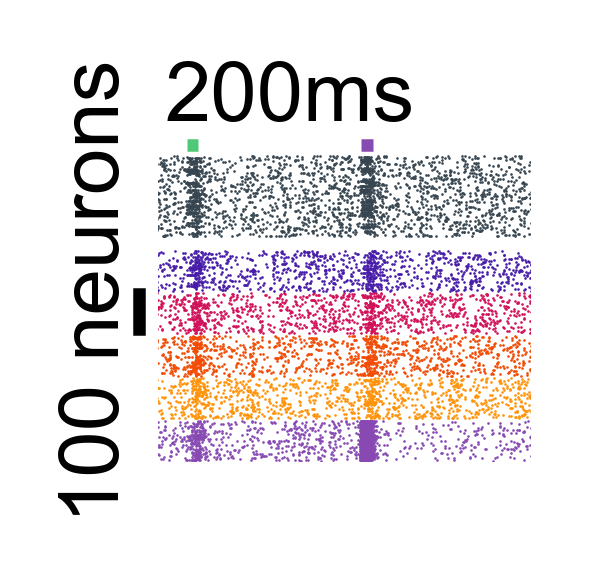

In [86]:
# raster plots by neurons, ordered by engram
sts = np.load("../data/data_sims/seq_IF_EEEIIEII_6pPol/rule_examples/" + seed + ".npy" , allow_pickle=True).item()
# pretrain assessment: presenting every possible stimlus (would-be familiar or novel) to the naive network, weights fixed.
n_recorded = 4096
l_stim_on_pretraineng = 1
l_stim_off_pretraineng = 1
l_pre_test_record = 1
frac_size_engram = 0.05
lpt = 30
lt = 50
n_fam_stim = 5
n_nov_stim = 2
n_tot_stim = 7
ontime_test = 0.2
offtime_test = 2.8
nseqs_test = 15
seq_length_test = 4
break_durations = [1, 9, 10, 40, 60, 180, 300, 600,  2400, 10800]
n_tests = len(break_durations)
bin_size_big = 0.1
l_pretraineng_tot = n_tot_stim*(l_stim_on_pretraineng+l_stim_off_pretraineng)
l_singlestims_test = n_tot_stim*(ontime_test + offtime_test)
l_seqstims_test = nseqs_test*(seq_length_test*ontime_test+offtime_test)
l_1test = l_singlestims_test + l_seqstims_test
test_starts = np.zeros(len(break_durations))
test_starts[0] = lpt + l_pretraineng_tot + lt + break_durations[0]
for i in range(1,len(break_durations)):
    test_starts[i] = test_starts[i-1] + break_durations[i] + l_1test
engram_neurons = aux.get_engram_neurons_npy(n_tot_stim, lpt, l_stim_on_pretraineng, l_stim_off_pretraineng, frac_size_engram, n_recorded, sts)
eng_rates = aux.get_eng_rate_npy(sts, test_starts, l_pre_test_record, l_1test, bin_size_big, n_tests, n_recorded, n_tot_stim, engram_neurons)

#make the ordering per engram. problem, some neurons can be assigned to 2 engrams, thouhg it is rare.
# assign a unique label to each neuron
neuron_label = np.zeros(n_recorded) + 7 #0->nov1, ... 6->fam5, 7 unassigned
for i in range(n_recorded):
    found = False
    eng_count = 0
    while (not found) and (eng_count <= 6):
        if len(np.argwhere(engram_neurons[eng_count, :] == i))>0:
            found = True
            neuron_label[i] = eng_count
        eng_count += 1

test_sessions = [2, 9]
neuron_label_bis = np.array(neuron_label)
neuron_label_bis[np.where(neuron_label_bis==0)[0]] = -1
neuron_label_bis[np.where(neuron_label_bis==1)[0]] = -1
neuron_label_bis[np.where(neuron_label_bis==2)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==2)[0][:100]] = 0

neuron_label_bis[np.where(neuron_label_bis==3)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==3)[0][:100]] = 1

neuron_label_bis[np.where(neuron_label_bis==4)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==4)[0][:100]] = 2

neuron_label_bis[np.where(neuron_label_bis==5)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==5)[0][:100]] = 3

neuron_label_bis[np.where(neuron_label_bis==6)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==6)[0][:100]] = 4

neuron_label_bis[np.where(neuron_label_bis==7)[0][200:]] = -1
neuron_label_bis[np.where(neuron_label_bis==7)[0][:200]] = 5
for test_session in test_sessions:
    print('test_session', test_session)
    aux.plot_raster_w_engrams_sep_background(sts=sts,
        neuron_labels=neuron_label_bis,
        n_recorded=n_recorded,
        colors_label = ['#36454F', aux.color_nov1, aux.color_fam1, aux.color_fam2, aux.color_fam3, aux.color_fam4, aux.color_fam5, '#36454F'],
        colors_raster = [aux.color_fam1, aux.color_fam2, aux.color_fam3, aux.color_fam4, aux.color_fam5, '#36454F'],
        x_lim = [test_starts[test_session]+2.5, test_starts[test_session]+8.9],
        markersize=0.1,
        lag_engr_bg = 30,
        t_start_each_stim = [i*(ontime_test + offtime_test) for i in range(7)] + test_starts[test_session],
        ontime = ontime_test,
        linewidth_stim_line=1.5,
        y_stim_line = 730,
        figsize= (0.8,0.7), #(2.1,0.7), (0.8,0.7) (1.5,0.7)
        x_label= "200ms", #r'$4$' + "h"
        x_ticks= [],
        x_ticklabels= [],
        y_ticks=[],
        y_label="100 neurons",
        y_lim=[0,800], #1400
        fontsize=10,
        dpi=600,
        ylabel_xloc=0.0,
        ylabel_yloc=0.0,
        xlabel_xloc=0.40,
        xlabel_yloc=0.92,
        y_bar_xloc=-0.05,
        y_bar_ylocs=[2.85/7, 3.6/7],
        axwidth=1.5);plt.show()

#### Flat replay

n_flat_replay 23 0.0092


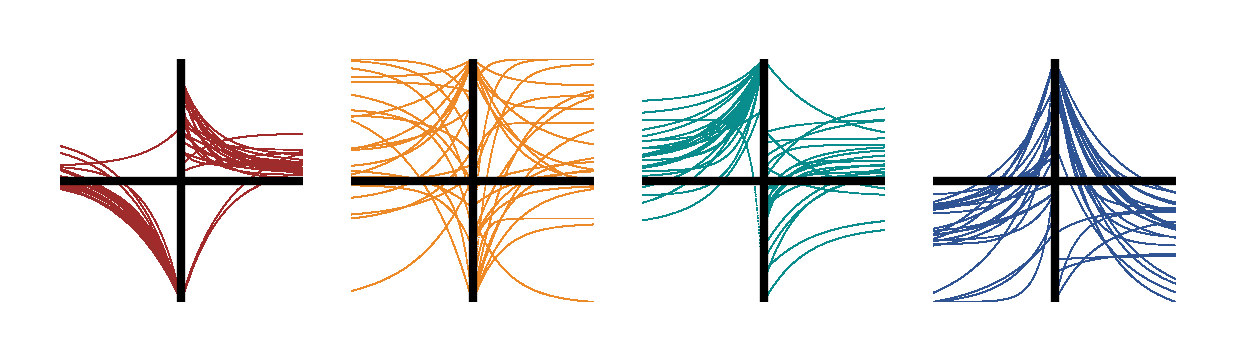

In [63]:
# select rules for flat/coincidental replay
inds_flat_replay = np.unique(np.where( aux.N_OR( [aux.N_AND([rhos_max_av[:,t]>2, (ts_max[0, :, t]-start_inds[0])<4]) for t in range(10)] ))[0])
n_flat_replay = len(inds_flat_replay)
print('n_flat_replay', n_flat_replay, n_flat_replay/2500)

n_timebins = 1000; n_dwbins=1000
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(seq[inds_flat_replay]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)

aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

/Users/bcfx/Documents/Memory1000Rules/Code/Code_For_Paper/results/aux.py:630: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


test_session 2


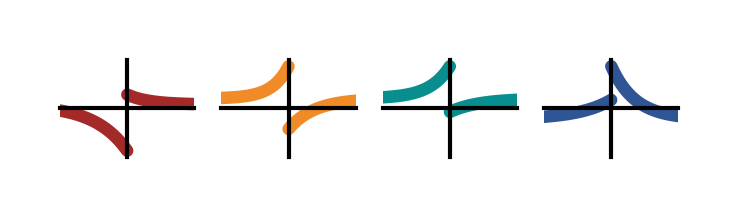

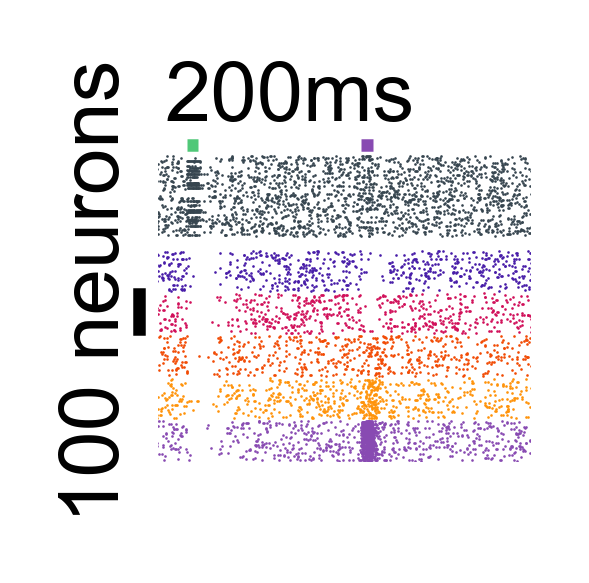

test_session 9


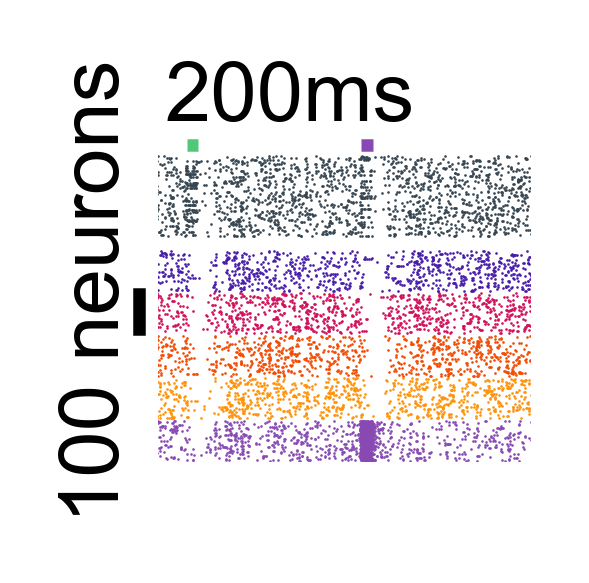

In [ ]:
# raster plots by neurons, ordered by engram
seed = 'fab977d6038914f8c0e89ea301e8d3a0'

ind_seed = np.where(seq['seed'] == seed)[0][0]
rule = seq[ind_seed]['theta']
aux.plot_4_rules(rule, linewidth=1.5, axwidth=0.5,figsize=(1.33,0.21)); plt.show()

sts = np.load("../data/data_sims/seq_IF_EEEIIEII_6pPol/rule_examples/" + seed + ".npy" , allow_pickle=True).item()
# pretrain assessment: presenting every possible stimlus (would-be familiar or novel) to the naive network, weights fixed.
n_recorded = 4096
l_stim_on_pretraineng = 1
l_stim_off_pretraineng = 1
l_pre_test_record = 1
frac_size_engram = 0.05
lpt = 30
lt = 50
n_fam_stim = 5
n_nov_stim = 2
n_tot_stim = 7
ontime_test = 0.2
offtime_test = 2.8
nseqs_test = 15
seq_length_test = 4
break_durations = [1, 9, 10, 40, 60, 180, 300, 600,  2400, 10800]
n_tests = len(break_durations)
bin_size_big = 0.1
l_pretraineng_tot = n_tot_stim*(l_stim_on_pretraineng+l_stim_off_pretraineng)
l_singlestims_test = n_tot_stim*(ontime_test + offtime_test)
l_seqstims_test = nseqs_test*(seq_length_test*ontime_test+offtime_test)
l_1test = l_singlestims_test + l_seqstims_test
test_starts = np.zeros(len(break_durations))
test_starts[0] = lpt + l_pretraineng_tot + lt + break_durations[0]
for i in range(1,len(break_durations)):
    test_starts[i] = test_starts[i-1] + break_durations[i] + l_1test
engram_neurons = aux.get_engram_neurons_npy(n_tot_stim, lpt, l_stim_on_pretraineng, l_stim_off_pretraineng, frac_size_engram, n_recorded, sts)
eng_rates = aux.get_eng_rate_npy(sts, test_starts, l_pre_test_record, l_1test, bin_size_big, n_tests, n_recorded, n_tot_stim, engram_neurons)

#make the ordering per engram. problem, some neurons can be assigned to 2 engrams, thouhg it is rare.
# assign a unique label to each neuron
neuron_label = np.zeros(n_recorded) + 7 #0->nov1, ... 6->fam5, 7 unassigned
for i in range(n_recorded):
    found = False
    eng_count = 0
    while (not found) and (eng_count <= 6):
        if len(np.argwhere(engram_neurons[eng_count, :] == i))>0:
            found = True
            neuron_label[i] = eng_count
        eng_count += 1

test_sessions = [2, 9]
neuron_label_bis = np.array(neuron_label)
neuron_label_bis[np.where(neuron_label_bis==0)[0]] = -1
neuron_label_bis[np.where(neuron_label_bis==1)[0]] = -1
neuron_label_bis[np.where(neuron_label_bis==2)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==2)[0][:100]] = 0

neuron_label_bis[np.where(neuron_label_bis==3)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==3)[0][:100]] = 1

neuron_label_bis[np.where(neuron_label_bis==4)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==4)[0][:100]] = 2

neuron_label_bis[np.where(neuron_label_bis==5)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==5)[0][:100]] = 3

neuron_label_bis[np.where(neuron_label_bis==6)[0][100:]] = -1
neuron_label_bis[np.where(neuron_label_bis==6)[0][:100]] = 4

neuron_label_bis[np.where(neuron_label_bis==7)[0][200:]] = -1
neuron_label_bis[np.where(neuron_label_bis==7)[0][:200]] = 5
for test_session in test_sessions:
    print('test_session', test_session)
    aux.plot_raster_w_engrams_sep_background(sts=sts,
        neuron_labels=neuron_label_bis,
        n_recorded=n_recorded,
        colors_label = ['#36454F', aux.color_nov1, aux.color_fam1, aux.color_fam2, aux.color_fam3, aux.color_fam4, aux.color_fam5, '#36454F'],
        colors_raster = [aux.color_fam1, aux.color_fam2, aux.color_fam3, aux.color_fam4, aux.color_fam5, '#36454F'],
        x_lim = [test_starts[test_session]+2.5, test_starts[test_session]+8.9],
        markersize=0.1,
        lag_engr_bg = 30,
        t_start_each_stim = [i*(ontime_test + offtime_test) for i in range(7)] + test_starts[test_session],
        ontime = ontime_test,
        linewidth_stim_line=1.5,
        y_stim_line = 730,
        figsize= (0.8,0.7), #(2.1,0.7), (0.8,0.7) (1.5,0.7)
        x_label= "200ms", #r'$4$' + "h"
        x_ticks= [],
        x_ticklabels= [],
        y_ticks=[],
        y_label="100 neurons",
        y_lim=[0,800], #1400
        fontsize=10,
        dpi=600,
        ylabel_xloc=0.0,
        ylabel_yloc=0.0,
        xlabel_xloc=0.40,
        xlabel_yloc=0.92,
        y_bar_xloc=-0.05,
        y_bar_ylocs=[2.85/7, 3.6/7],
        axwidth=1.5);plt.show()

### Function rarity, strong performers (Fig2.H)

only consider the 2500 rule quartets from the stability manifold here

In [89]:
# novelty detection, familiarity detection and transient dynamics
save_dir = "../../../Data_Sims/BND_IF_EEEIIEII_6pPol/"

data1 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_19082024_metrics.npy",))
data2 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_20082024_metrics.npy",))
data3 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_17092024_metrics.npy",))
data4 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_22092024_metrics.npy",))
data5 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_24092024_metrics.npy",))
dataset_list = [data1, data2, data3, data4, data5]

n_rules = len(data1)
dr = np.array([2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01) for d in dataset_list])
dsr = np.array([2*(d['std_nov'] - d['std_fam']) / (d['std_nov'] + d['std_fam']+0.01) for d in dataset_list])
mdr = np.mean(dr, axis=0)
mdsr = np.mean(dsr, axis=0)
on_nov = np.max(data1['prate'][:,:,10:20], axis=2)/(np.nanmean(data1['prate'][:,:,10:20], axis=2)+0.01)

n_ts = 10
pvalues = np.zeros((n_rules, n_ts))
for t in range(n_ts):
    for ind in range(n_rules):
        r_nov_samples = np.array([d['r_nov'][ind,t] for d in dataset_list])
        r_fam_samples = np.array([d['r_fam'][ind,t] for d in dataset_list])
        pvalues[ind, t] = ttest_ind(r_nov_samples, r_fam_samples).pvalue
sign_resp_bnd = pvalues < 0.05

n_ts = 10
pvalues_trampl = np.zeros((n_rules, n_ts))
for t in range(n_ts):
    for ind in range(n_rules):
        on_nov_samples = np.array([np.max(d['prate'][ind,t,10:20], axis=0)/(np.nanmean(d['prate'][ind,t,10:20], axis=0)+0.01) for d in dataset_list])
        on_fam_samples = np.array([np.max(d['prate'][ind,t,50:60], axis=0)/(np.nanmean(d['prate'][ind,t,50:60], axis=0)+0.01) for d in dataset_list])
        pvalues_trampl[ind, t] = ttest_ind(on_nov_samples, on_fam_samples).pvalue
sign_resp_trampl = pvalues_trampl < 0.05

retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations


/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/2385990468.py:16: RuntimeWarning: Mean of empty slice
  on_nov = np.max(data1['prate'][:,:,10:20], axis=2)/(np.nanmean(data1['prate'][:,:,10:20], axis=2)+0.01)
/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/2385990468.py:31: RuntimeWarning: Mean of empty slice
  on_nov_samples = np.array([np.max(d['prate'][ind,t,10:20], axis=0)/(np.nanmean(d['prate'][ind,t,10:20], axis=0)+0.01) for d in dataset_list])
/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/2385990468.py:32: RuntimeWarning: Mean of empty slice
  on_fam_samples = np.array([np.max(d['prate'][ind,t,50:60], axis=0)/(np.nanmean(d['prate'][ind,t,50:60], axis=0)+0.01) for d in dataset_list])


In [91]:
# successor representation + contextual novelty
seq3 = aux.load_and_merge("../../../Data_Sims/seq_IF_EEEIIEII_6pPol/",("2500_seq_1s4hBreaks_16112024_metrics.npy",)) #1235
seq_list = [seq3]

break_durations = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
total_breaks = [np.sum(break_durations[:i+1]) for i in range(len(break_durations))]
n_fam = 5
n_tot = 7
n_nov = 2
n_rules = seq3['eng_rate'].shape[0]
n_tests = seq3['eng_rate'].shape[1]
n_engs = seq3['eng_rate'].shape[2]
n_bins = seq3['eng_rate'].shape[3]
ontime_test = 2 #in number of bins. usually bin is 0.1s
offtime_test = 28 #in number of bins. usually bin is 0.1s
test_starts = 10 #in number of bins, how long do we record pretest (usually 1s)
t_breaks = [1, 9,  10, 40, 60,  180, 300, 600,  2400, 10800]

# contextual novelty
inds_stim = aux.get_inds_last_el_sequence_stim_pres(n_bins, test_starts, ontime_test, offtime_test,n_fam,n_nov)
r_famfam =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5)] for seq in seq_list ] )
r_famnov =  np.array( [[np.mean(seq['prate'][:,:,inds_stim[i]], axis=2) for i in range(5,10)] for seq in seq_list ] )
n_ts = 10
pvalues_famnov =np.zeros((n_rules, n_ts))
for t in range(n_ts):
    for ind in range(n_rules):
        r_famfam_samples = r_famfam[:,:,ind,t].flatten()
        r_famnov_samples = r_famnov[:,:,ind,t].flatten()
        pvalues_famnov[ind,t] = ttest_ind(r_famnov_samples, r_famfam_samples).pvalue
sign_resp_cont_nov = pvalues_famnov < 0.05

aux_big_array = np.nan_to_num(aux.get_dr_stfam(n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test, rpop=seq3['prate'],n_fam=n_fam,n_nov=n_nov), nan=0)
dr_famnov = aux_big_array[0,:,:]

# successor representation
fams_novs_ttest = [aux.get_rsucc_rnov(eng_rate=seq['eng_rate'], n_tot=n_tot, n_bins=n_bins, test_starts=test_starts, ontime_test=ontime_test, offtime_test=offtime_test,
                 n_rules=n_rules, n_tests=n_tests, n_fam=n_fam, n_engs=n_engs) for seq in seq_list]

metric_num = 3 #3 = m+1
pvalues_succ =np.zeros((n_rules, n_ts))
for test_num in range(n_ts):
    for rule_num in range(n_rules):
        fam_samples = np.array( [ fams_novs_ttest[i][0][rule_num,test_num,metric_num,:] for i in range(len(seq_list)) ] ).flatten()
        nov_samples = np.array( [ fams_novs_ttest[i][1][rule_num,test_num,:,:] for i in range(len(seq_list)) ] ).flatten()
        pvalues_succ[rule_num, test_num] = ttest_ind(nov_samples, fam_samples).pvalue
sign_resp_succ = pvalues_succ < 0.05

# replay
rhos = aux.get_rhos(np.nan_to_num(seq3['eng_rate'], nan=0), n_fam=5, n_nov=2)
start_inds, stop_inds = aux.get_inds_start_single_stim_pres(test_starts, ontime_test, offtime_test)
ts_max = aux.get_ts_maxrhos(rhos, start_inds, stop_inds, n_fam=5)
rhos_max = np.zeros( ts_max.shape)
for i in range(ts_max.shape[0]):
    for j in range(ts_max.shape[1]):
        for k in range(ts_max.shape[2]):
            rhos_max[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]
rhos_max_av = np.mean(rhos_max, axis=0)

rhos_spec = np.zeros( ts_max.shape)
for i in range(ts_max.shape[0]):
    for j in range(ts_max.shape[1]):
        for k in range(ts_max.shape[2]):
            rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]
rhos_spec_av = np.nan_to_num(np.mean(rhos_spec, axis=0), nan=0)

retrieved 2500/2500 simulations


/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/3659751985.py:63: RuntimeWarning: invalid value encountered in scalar divide
  rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]
/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/3659751985.py:63: RuntimeWarning: divide by zero encountered in scalar divide
  rhos_spec[i,j,k] = rhos[i, j, k, ts_max[i, j, k]]/rhos[(i+1)%n_fam, j, k, ts_max[i, j, k]]


In [92]:
# number of rules with different functions, harsh definitions when applicable
inds_nov_hard = np.unique(np.where( aux.N_AND([mdr[:,3]>0.1, mdr[:,4]>0.1, mdr[:,5]>0.1, mdr[:,6]>0.1, mdr[:,7]>0.1, mdr[:,8]>0.1, mdr[:,9]>0.1])))
n_nov_hard = len(inds_nov_hard)
print('n_nov_hard', n_nov_hard, n_nov_hard/2500)

inds_fam_hard  = np.unique(np.where( aux.N_OR( [aux.N_AND([mdr[:,t]<-0.1, mdr[:,t+1]<-0.1, mdr[:,t+2]<-0.2]) for t in range(0,8,1)] )))
n_fam_hard = len(inds_fam_hard)
print('n_fam_hard', n_fam_hard, n_fam_hard/2500)

inds_ON_hard = np.unique(np.where( np.all(on_nov[:,5:] >= 1.8, axis=1)))
n_ON_hard = len(inds_ON_hard)
print('n_ON_hard', n_ON_hard, n_ON_hard/2500)

inds_flat_replay = np.unique(np.where( aux.N_OR( [aux.N_AND([rhos_max_av[:,t]>2, (ts_max[0, :, t]-start_inds[0])<4]) for t in range(10)] ))[0])
n_flat_replay = len(inds_flat_replay)
print('n_flat_replay', n_flat_replay, n_flat_replay/2500)

inds_seq_replay = np.unique(np.where( aux.N_OR( [aux.N_AND([rhos_max_av[:,t]>2, (ts_max[0, :, t]-start_inds[0])>4, rhos_spec_av[:,t]>1.5]) for t in range(10)] ))[0])
n_seq_replay = len(inds_seq_replay)
print('n_seq_replay', n_seq_replay, n_seq_replay/2500)

inds_cont_nov_hard = np.unique(np.where( np.all(dr_famnov[:,1:6] >= 0.15, axis=1)))
n_cont_nov_hard = len(inds_cont_nov_hard)
print('n_cont_nov_hard', n_cont_nov_hard, n_cont_nov_hard/2500)

n_functions_per_rule = np.zeros(n_rules)
for i in range(n_rules):
    n_functions_per_rule[i] = (i in inds_nov_hard) + (i in inds_fam_hard) + \
        (i in inds_ON_hard) + (i in inds_flat_replay) + (i in inds_seq_replay) +\
        (i in inds_cont_nov_hard)

n_0_function = len(np.where(n_functions_per_rule==0)[0])
n_1_function = len(np.where(n_functions_per_rule==1)[0])
n_2_function = len(np.where(n_functions_per_rule==2)[0])
n_3_function = len(np.where(n_functions_per_rule==3)[0])
n_4_function = len(np.where(n_functions_per_rule==4)[0])
print(n_0_function, n_1_function, n_2_function, n_3_function, n_4_function, n_0_function+n_1_function+n_2_function+n_3_function+n_4_function)

n_nov_hard 19 0.0076
n_fam_hard 15 0.006
n_ON_hard 8 0.0032
n_flat_replay 1 0.0004
n_seq_replay 2 0.0008
n_cont_nov_hard 6 0.0024
2452 45 3 0 0 2500


/var/folders/fg/6y_rzvdn0_s9tr1lxxw5r9p40000gn/T/ipykernel_19607/1127283122.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=25, ha='right', font='arial', fontsize=fontsize)


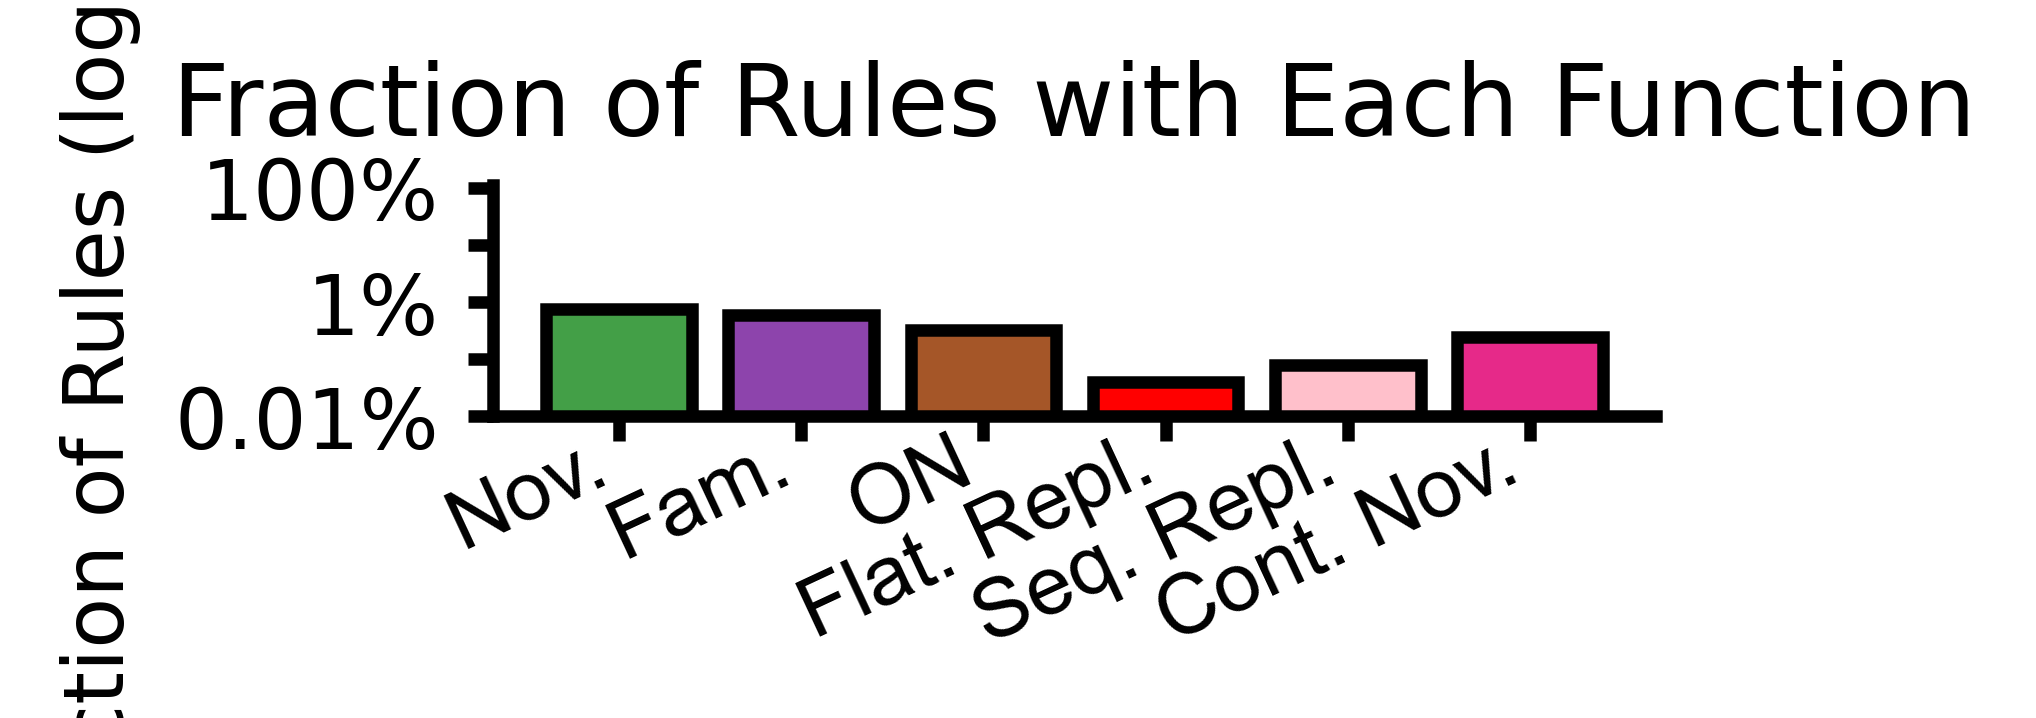

In [93]:
figsize = (2.5, 0.5)
dpi=600
fontsize=10
axwidth=1.5
# Define the total number of rules
total_rules = len(sign_resp_bnd)

# Define the counts for each function
n_nov_hard_fraction = n_nov_hard/total_rules
n_fam_hard_fraction = n_fam_hard / total_rules
n_ON_hard_fraction = n_ON_hard / total_rules
n_flat_replay_fraction = n_flat_replay / total_rules
n_seq_replay_fraction = n_seq_replay / total_rules
n_cont_nov_hard_fraction = n_cont_nov_hard / total_rules

# Define labels and fractions
labels = ['Nov.', 'Fam.', 'ON', 'Flat. Repl.', 'Seq. Repl.', 'Cont. Nov.']
fractions = [n_nov_hard_fraction, n_fam_hard_fraction, n_ON_hard_fraction,\
              n_flat_replay_fraction, n_seq_replay_fraction, n_cont_nov_hard_fraction]

# color_trampl = (255/256, 255/256, 51/256)
color_trampl = (166/256, 86/256, 40/256)
color_fam = (142/256,68/256,173/256)
color_nov= (67/256,160/256, 71/256)
color_stfam = (231/256, 41/256, 138/256)
color_flat_replay = 'red'
color_seq_replay = "pink"

# Create the bar plot with a logarithmic y-axis
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
ax.bar(labels, fractions, color=[color_nov, color_fam, color_trampl, color_flat_replay, color_seq_replay, color_stfam], 
       edgecolor='black', linewidth=axwidth)
ax.set_ylabel('Fraction of Rules (log scale)')
ax.set_title('Fraction of Rules with Each Function')
ax.set_yscale('log')
ax.set_ylim(1e-4, 1.1)  # Adjust the limits to fit the data
ax.set_yticks([1e-4, 1e-3, 1e-2, 1e-1, 1])
ax.set_yticklabels(['0.01%', '', '1%', '','100%'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(axwidth)
ax.spines['left'].set_linewidth(axwidth)
ax.tick_params(axis='x', pad=-2)
ax.set_xticklabels(labels, rotation=25, ha='right', font='arial', fontsize=fontsize)

ax.tick_params(axis='x', width=axwidth, labelsize=fontsize, length=2*axwidth)
ax.tick_params(axis='y', width=axwidth, labelsize=fontsize, length=2*axwidth)

plt.show()